In [118]:
%matplotlib inline
import matplotlib
matplotlib.use('Qt5Agg')  # Posible solución en caso de problemas de "backend" con las imágenes/plots.
#matplotlib.use('qtagg')  # Solución online proponía como "backend" de matplotlib: Qt4Agg, pero ya no está disponible.
import matplotlib.pyplot as plt # No eliminar (el código debajo podría dejar de funcionar?).
import numpy as np
import os
import sys
import json
import pandas as pd
from tqdm import tqdm
from wordcloud import WordCloud

# Las estamos usando?
from mpl_toolkits import mplot3d  # Plots en 3D
import seaborn as sns; sns.set()  # for plot styling

# CREO que no las estamos usando:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs  # <- versión actual de "from sklearn.datasets.samples_generator import make_blobs"
# Igual esto último no lo estamos usando

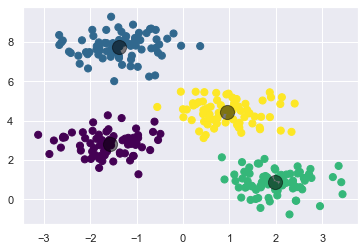

In [32]:
# Probatura.

# ¿Nos puede interesar un clustering analysis?
# Ref. https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [12]:
# En nuestro caso no usaremos clustering, no veo claro que nos vaya a aportar información adicional (véanse gráficos más abajo).

In [38]:
# Para la fusión de los ficheros obtenidos en el notebook "1".
file_0 = "C:0_Posts_PSAW-PRAW_controversial_batch_0_999.json"  # "Seed" for the full dataframe.
files_list = ["C:1_Posts_PSAW-PRAW_controversial_batch_1000_1999.json",
         "C:2_Posts_PSAW-PRAW_controversial_batch_2000_2999.json", "C:3_Posts_PSAW-PRAW_controversial_batch_3000_3999.json",
         "C:4_Posts_PSAW-PRAW_controversial_batch_4000_4999.json", "C:5_Posts_PSAW-PRAW_controversial_batch_5000_5999.json",
         "C:6_Posts_PSAW-PRAW_controversial_batch_6000_6999.json"]

In [35]:
results_df = pd.DataFrame()

with open(file_0) as f_json:
    batch_0 = json.load(f_json)
    results_df = pd.DataFrame(batch_0)
    
    

In [39]:
batch = pd.DataFrame()

for file in files_list:
    with open(file) as f_json:
        batch = json.load(f_json)  # Cargamos un fichero .json parcial
        batch = pd.DataFrame(batch)  # Convertimos a dataframe pandas.
        results_df = pd.concat([results_df, batch], ignore_index = True)  # Consolidamos en un único fichero.
        
        print("Added " + str(file) + " to the dataframe.")

# Realmente podríamos haber abierto el fichero creado en el notebook "2".
# No ha sido así porque han sido trabajos en paralelo.

Added C:1_Posts_PSAW-PRAW_controversial_batch_1000_1999.json to the dataframe.
Added C:2_Posts_PSAW-PRAW_controversial_batch_2000_2999.json to the dataframe.
Added C:3_Posts_PSAW-PRAW_controversial_batch_3000_3999.json to the dataframe.
Added C:4_Posts_PSAW-PRAW_controversial_batch_4000_4999.json to the dataframe.
Added C:5_Posts_PSAW-PRAW_controversial_batch_5000_5999.json to the dataframe.
Added C:6_Posts_PSAW-PRAW_controversial_batch_6000_6999.json to the dataframe.


In [40]:
results_df

,id,title,author,created_utc,score,upvote_ratio,num_comments,selftext,comments
0,vnl86g,"Ethnicity isn’t something that can be changed,...",ZaMeneDushaDava,1.656524e+09,1,0.57,12,Left wing liberals usually think that ethnicit...,<praw.models.comment_forest.CommentForest obje...
1,vn82rq,Assuming someones gender or ethnicity based on...,donotholdyourbreath,1.656481e+09,4,0.70,7,Unless you are willing to do that for every op...,<praw.models.comment_forest.CommentForest obje...
2,vn41at,The Tucker Carlson Tonight show gets unfair cr...,IMEUF,1.656468e+09,6,0.58,12,I think the strongest criticism comes from peo...,<praw.models.comment_forest.CommentForest obje...
3,vn2jmj,"It's time for federal abortion legislation, bu...",YourEyesAreBleeding,1.656464e+09,0,0.50,28,The left is calling for federal laws that ensh...,<praw.models.comment_forest.CommentForest obje...
4,vn1kii,Sex workers develop men romantically.,princessscarlet12,1.656461e+09,24,0.68,28,"As a stripper, I have had to explain feminine ...",<praw.models.comment_forest.CommentForest obje...
...,...,...,...,...,...,...,...,...,...
1876,pmju6n,[deleted by user],None,1.631411e+09,1,0.52,14,[removed],<praw.models.comment_forest.CommentForest obje...
1877,pmgqro,I’m ok with a vaccine mandate,Orginal_Ricardo,1.631399e+09,42,0.62,243,This might be popular in a broad sense but it ...,<praw.models.comment_forest.CommentForest obje...
1878,pmg3ee,America seriously needs to move on from 9/11.,MySockHurts,1.631397e+09,0,0.47,88,[removed],<praw.models.comment_forest.CommentForest obje...
1879,pme498,People who hate Wall Street are people who don...,gaudog,1.631390e+09,8,0.60,11,I'm not a financial genius or anything but I'd...,<praw.models.comment_forest.CommentForest obje...


In [45]:
scores = results_df["score"]

In [46]:
type(scores)

pandas.core.series.Series

In [51]:
x_score = results_df["score"]
y_upvote = results_df["upvote_ratio"] 
z_comments = results_df["num_comments"]

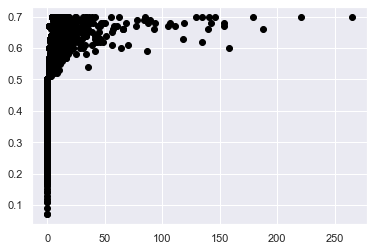

In [54]:
# Probatura
plt.plot(x_score, y_upvote, 'o', color='black');   # Se podría usar el color para indicar el sentimiento.

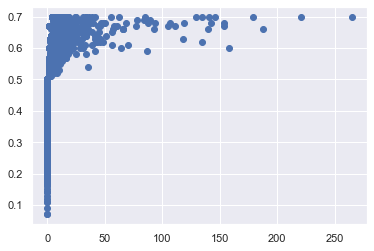

In [55]:
# Probatura
plt.scatter(x_score, y_upvote, marker = 'o')

In [58]:
fig = plt.figure()


<Figure size 432x288 with 0 Axes>

In [59]:
x_score = results_df["score"]
y_upvote = results_df["upvote_ratio"] 
z_comments = results_df["num_comments"]

<IPython.core.display.Javascript object>


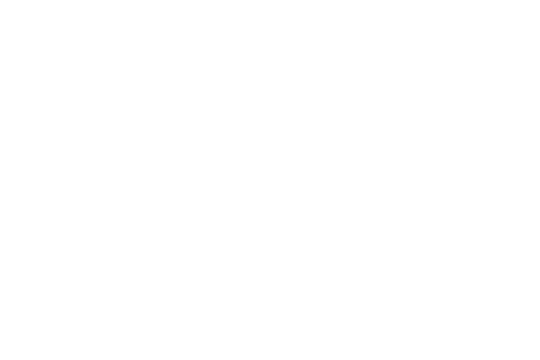

In [154]:
# Ref. https://matplotlib.org/stable/gallery/mplot3d/rotate_axes3d_sgskip.html
# %matplotlib notebook

fig3D = plt.figure()
ax3 = fig.add_subplot(projection='3d')

# Esto se representará en 3D, más abajo.
x_score = results_df["score"]
y_upvote = results_df["upvote_ratio"] 
z_comments = results_df["num_comments"]

ax3.scatter3D(x_score, y_upvote, z_comments, c=y_upvote, cmap='Reds');  # Color determinado por el "upvote".

# rotate the axes and update    # Esto no ha funcionado. Por ese motivo se ha hecho un GIF mediante los plots de más abajo.
for angle in range(0, 360):
    ax3.view_init(30, angle)
    plt.draw()
    plt.pause(.001)

<IPython.core.display.Javascript object>


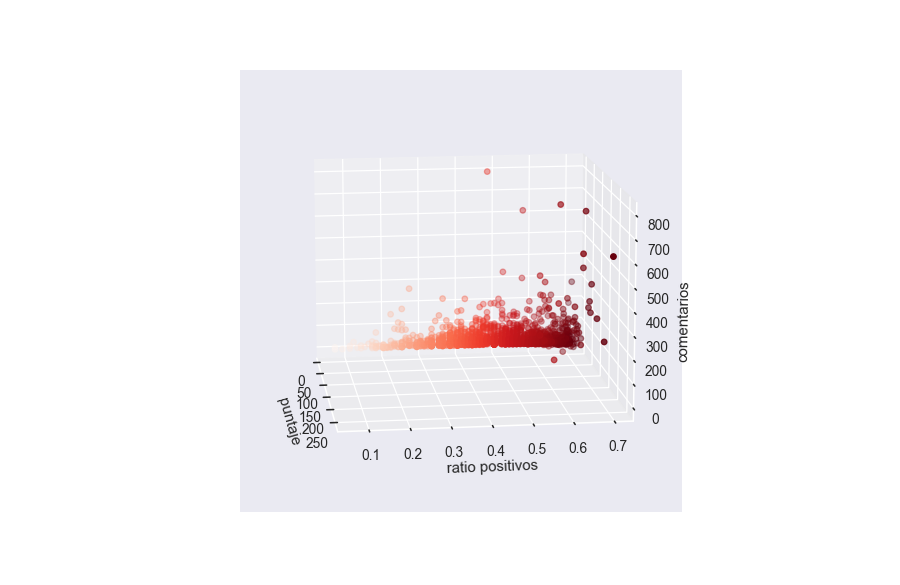

In [253]:
# Referencia!!!!  https://pythonguides.com/matplotlib-3d-scatter/
# Esta imagen será el primer GIF empleado para 

fig = plt.figure(figsize = (10, 6.5))
ax0 = plt.axes(projection='3d')
ax0.scatter3D(x_score, y_upvote, z_comments, c=y_upvote, cmap='Reds');  # Color determinado por el "upvote".
ax0.set_xlabel('puntaje')
ax0.set_ylabel('ratio positivos')
ax0.set_zlabel('comentarios')
# plt.title('Un vistazo a popularidad, puntaje y diálogo', fontweight='bold', size=12)
ax0.view_init(12.5, -7.5)

<IPython.core.display.Javascript object>


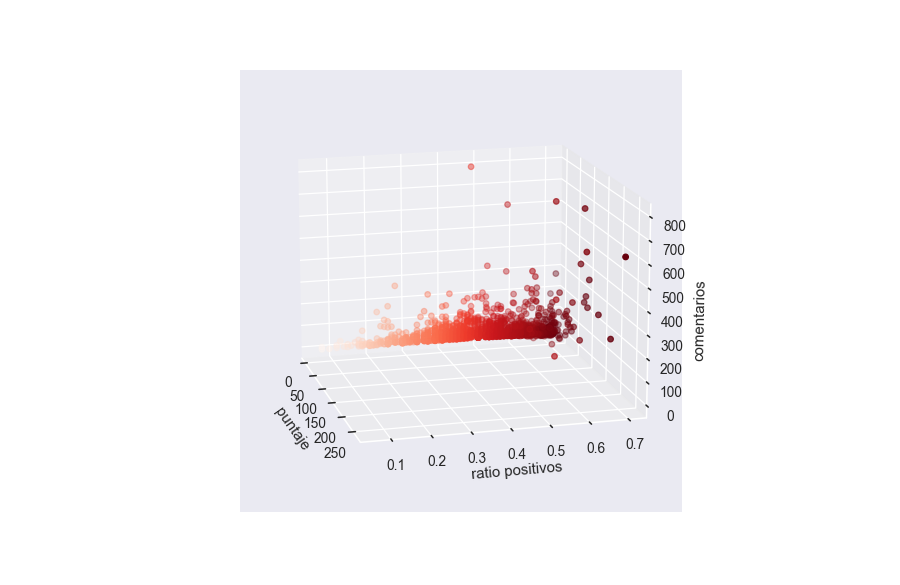

In [229]:
# Referencia!!!!  https://pythonguides.com/matplotlib-3d-scatter/
fig = plt.figure(figsize = (10, 6.5))
ax1 = plt.axes(projection='3d')
ax1.scatter3D(x_score, y_upvote, z_comments, c=y_upvote, cmap='Reds');  # Color determinado por el "upvote".
ax1.set_xlabel('puntaje')
ax1.set_ylabel('ratio positivos')
ax1.set_zlabel('comentarios')
# plt.title('Un vistazo a popularidad, puntaje y diálogo', fontweight='bold', size=12)
ax1.view_init(15, -15)

<IPython.core.display.Javascript object>


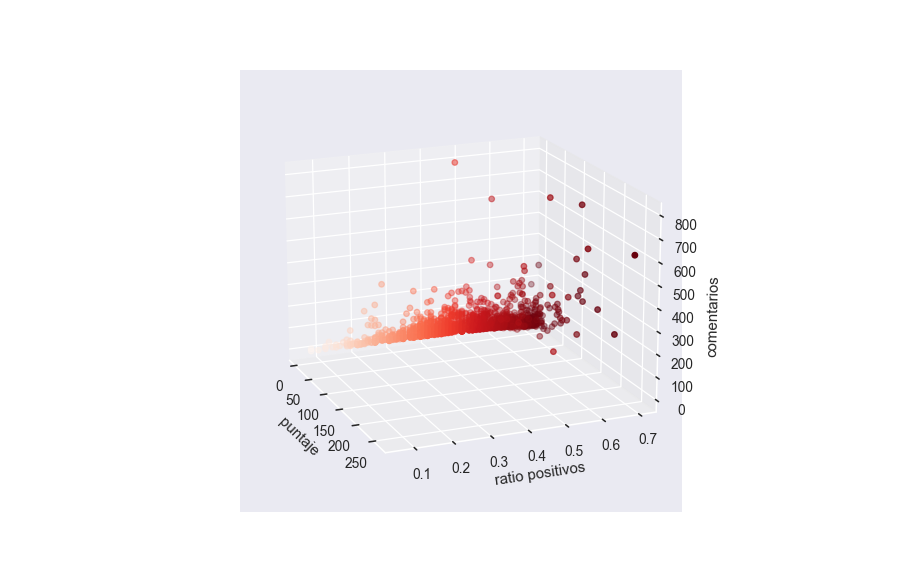

In [247]:
# Referencia!!!!  https://pythonguides.com/matplotlib-3d-scatter/
fig = plt.figure(figsize = (10, 6.5))
ax1b = plt.axes(projection='3d')
ax1b.scatter3D(x_score, y_upvote, z_comments, c=y_upvote, cmap='Reds');  # Color determinado por el "upvote".
ax1b.set_xlabel('puntaje')
ax1b.set_ylabel('ratio positivos')
ax1b.set_zlabel('comentarios')
ax1b.view_init(17.5, -22.5)

<IPython.core.display.Javascript object>


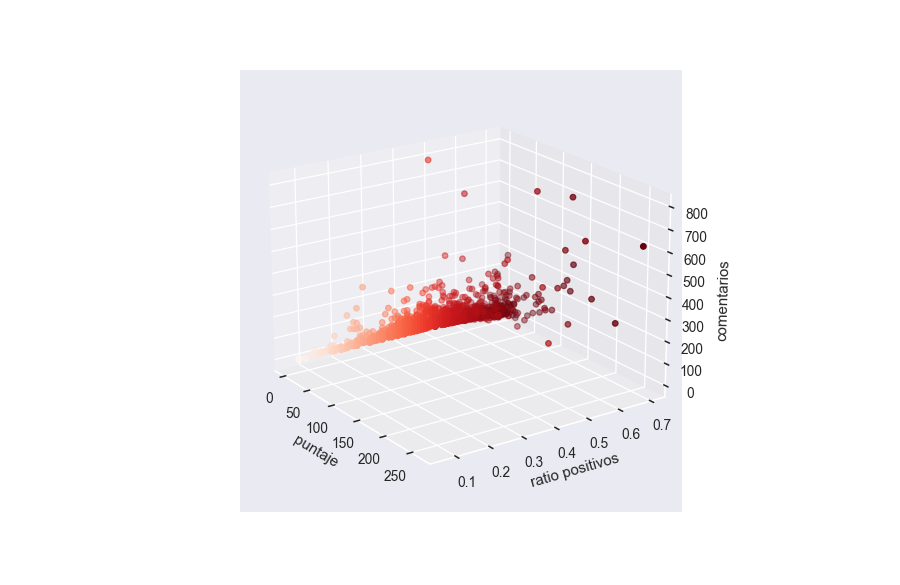

In [250]:
fig = plt.figure(figsize = (10, 6.5))
ax2 = plt.axes(projection='3d')
ax2.scatter3D(x_score, y_upvote, z_comments, c=y_upvote, cmap='Reds');  # Color determinado por el "upvote".
ax2.set_xlabel('puntaje')
ax2.set_ylabel('ratio positivos')
ax2.set_zlabel('comentarios')
# plt.title('Un vistazo a popularidad, puntaje y diálogo', fontweight='bold', size=12)
ax2.view_init(20, -35)

<IPython.core.display.Javascript object>


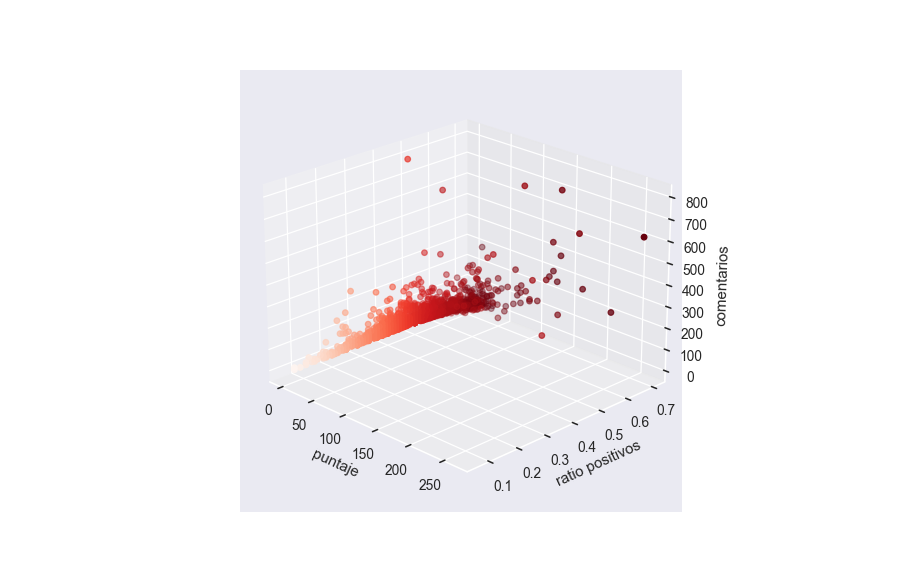

In [231]:
fig = plt.figure(figsize = (10, 6.5))
ax3 = plt.axes(projection='3d')
ax3.scatter3D(x_score, y_upvote, z_comments, c=y_upvote, cmap='Reds');  # Color determinado por el "upvote".
ax3.set_xlabel('puntaje')
ax3.set_ylabel('ratio positivos')
ax3.set_zlabel('comentarios')
# plt.title('Un vistazo a popularidad, puntaje y diálogo', fontweight='bold', size=12)
ax3.view_init(22.5, -45)

<IPython.core.display.Javascript object>


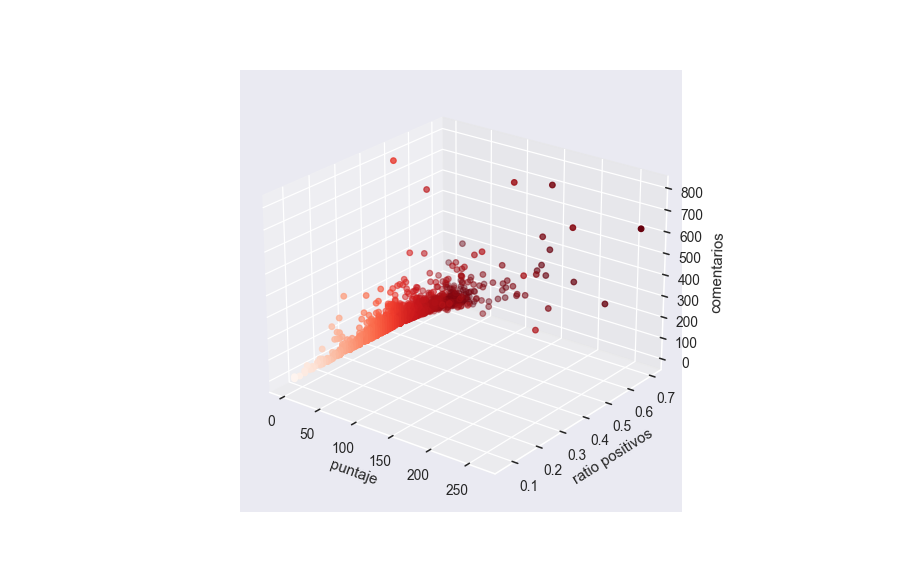

In [245]:
fig = plt.figure(figsize = (10, 6.5))
ax3b = plt.axes(projection='3d')
ax3b.scatter3D(x_score, y_upvote, z_comments, c=y_upvote, cmap='Reds');  # Color determinado por el "upvote".
ax3b.set_xlabel('puntaje')
ax3b.set_ylabel('ratio positivos')
ax3b.set_zlabel('comentarios')
# plt.title('Un vistazo a popularidad, puntaje y diálogo', fontweight='bold', size=12)
ax3b.view_init(23.75, -52.5)

<IPython.core.display.Javascript object>


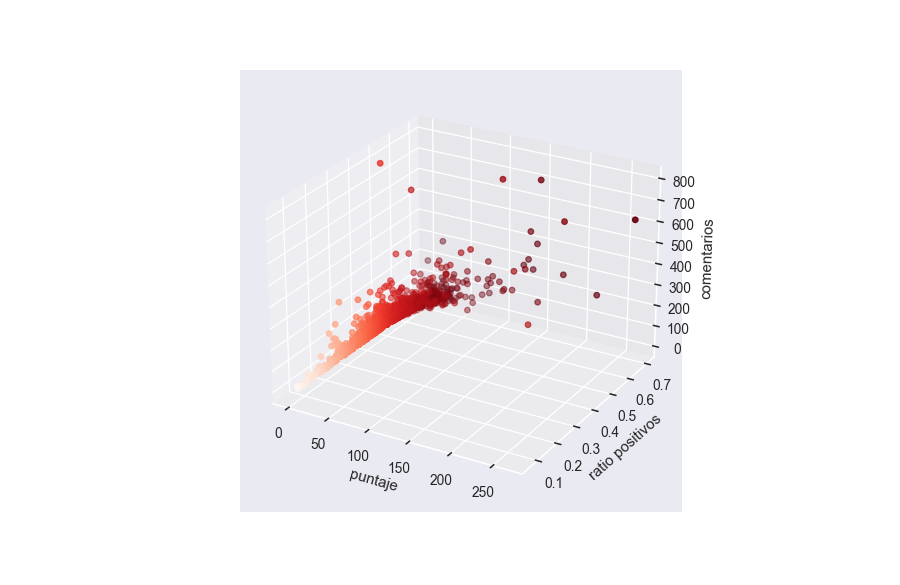

In [233]:
fig = plt.figure(figsize = (10, 6.5))
ax4 = plt.axes(projection='3d')
ax4.scatter3D(x_score, y_upvote, z_comments, c=y_upvote, cmap='Reds');  # Color determinado por el "upvote".
ax4.set_xlabel('puntaje')
ax4.set_ylabel('ratio positivos')
ax4.set_zlabel('comentarios')
# plt.title('Un vistazo a popularidad, puntaje y diálogo', fontweight='bold', size=12)
ax4.view_init(25, -60)

<IPython.core.display.Javascript object>


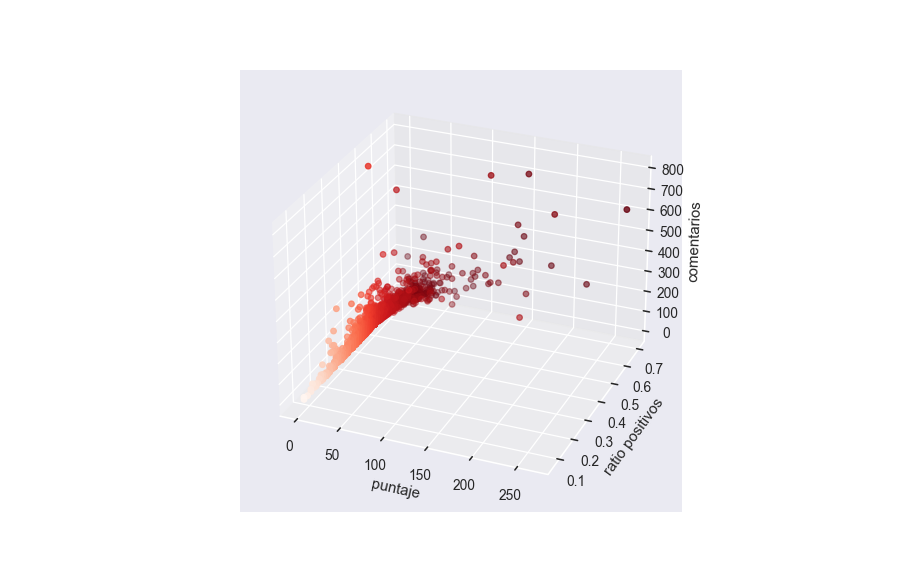

In [234]:
fig = plt.figure(figsize = (10, 6.5))
ax4b = plt.axes(projection='3d')
ax4b.scatter3D(x_score, y_upvote, z_comments, c=y_upvote, cmap='Reds');  # Color determinado por el "upvote".
ax4b.set_xlabel('puntaje')
ax4b.set_ylabel('ratio positivos')
ax4b.set_zlabel('comentarios')
# plt.title('Un vistazo a popularidad, puntaje y diálogo', fontweight='bold', size=12)
ax4b.view_init(27.5, -67.5)

<IPython.core.display.Javascript object>


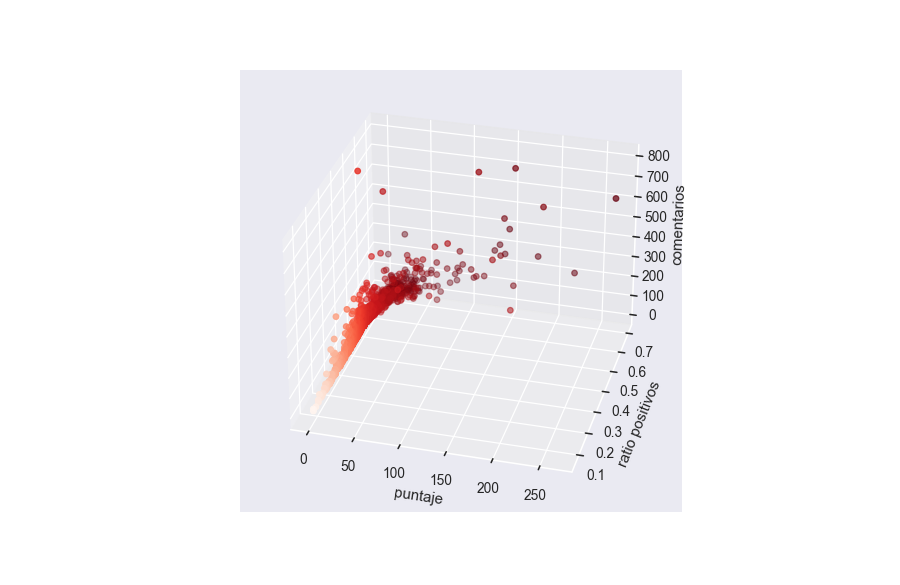

In [235]:
fig = plt.figure(figsize = (10, 6.5))
ax5 = plt.axes(projection='3d')
ax5.scatter3D(x_score, y_upvote, z_comments, c=y_upvote, cmap='Reds');  # Color determinado por el "upvote".
ax5.set_xlabel('puntaje')
ax5.set_ylabel('ratio positivos')
ax5.set_zlabel('comentarios')
# plt.title('Un vistazo a popularidad, puntaje y diálogo', fontweight='bold', size=12)
ax5.view_init(30, -75)

<IPython.core.display.Javascript object>


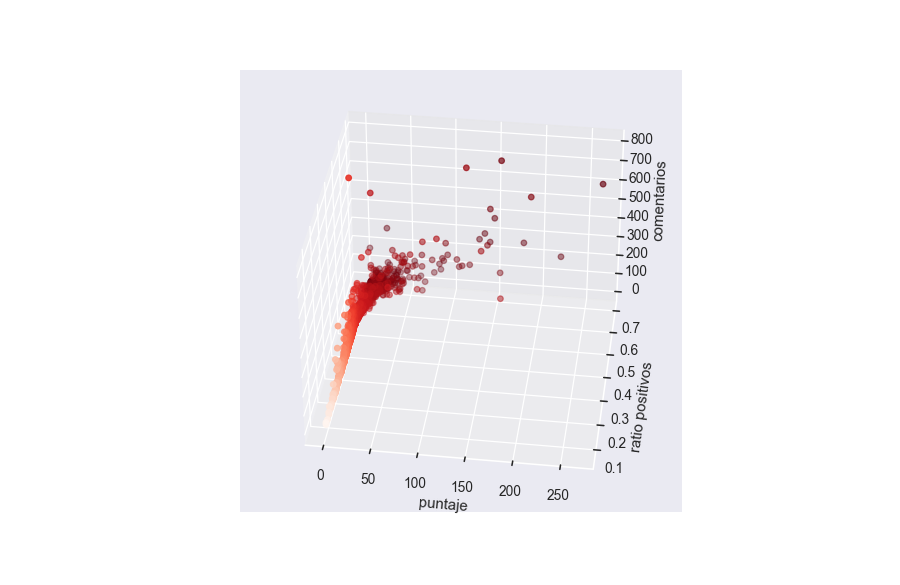

In [236]:
fig = plt.figure(figsize = (10, 6.5))
ax6 = plt.axes(projection='3d')
ax6.scatter3D(x_score, y_upvote, z_comments, c=y_upvote, cmap='Reds');  # Color determinado por el "upvote".
ax6.set_xlabel('puntaje')
ax6.set_ylabel('ratio positivos')
ax6.set_zlabel('comentarios')
# plt.title('Un vistazo a popularidad, puntaje y diálogo', fontweight='bold', size=12)
ax6.view_init(35, -82.5)

<IPython.core.display.Javascript object>


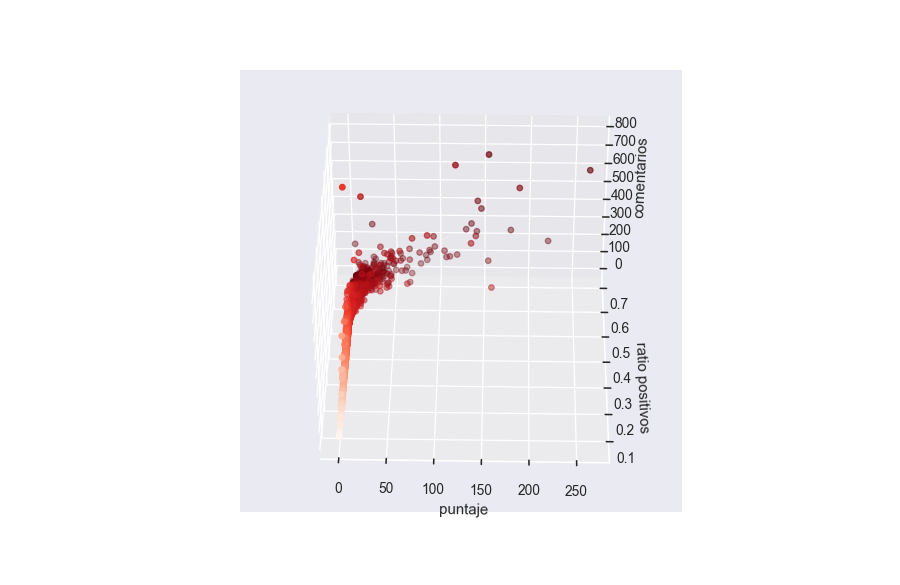

In [237]:
fig = plt.figure(figsize = (10, 6.5))
ax7 = plt.axes(projection='3d')
ax7.scatter3D(x_score, y_upvote, z_comments, c=y_upvote, cmap='Reds');  # Color determinado por el "upvote".
ax7.set_xlabel('puntaje')
ax7.set_ylabel('ratio positivos')
ax7.set_zlabel('comentarios')
# plt.title('Un vistazo a popularidad, puntaje y diálogo', fontweight='bold', size=12)
ax7.view_init(40, -89)

In [ ]:
# ------------------------------------------------------------------------------------------ #

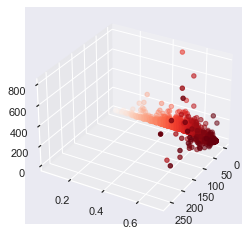

In [130]:
# Probatura (descarte)

ax1 = plt.axes(projection='3d')
ax1.scatter3D(x_score, y_upvote, z_comments, c=y_upvote, cmap='Reds');  # Color determinado por el "upvote".
ax1.view_init(30, 30)

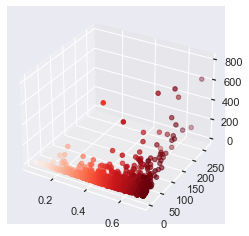

In [101]:
# Probatura (descarte)

ax2 = plt.axes(projection='3d')
ax2.scatter3D(y_upvote, x_score, z_comments, c=y_upvote, cmap='Reds');  # Color determinado por el "upvote".


In [78]:
x_upvote = results_df["upvote_ratio"]
y_comment = results_df["num_comments"] 
z_score = results_df["score"]

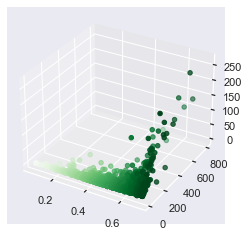

In [79]:
# Probatura (descarte)

ax2 = plt.axes(projection='3d')
ax2.scatter3D(x_upvote, y_comment, z_score, c=x_upvote, cmap='Greens');  # Color determinado por el "upvote".

In [89]:
x_score = results_df["score"]
y_upvote_ratio = results_df["upvote_ratio"]
z_comment = results_df["num_comments"]